In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from climtools import climtools_lib as ctl
import xarray as xr
import matplotlib.cbook as cbook
from scipy import stats
import pickle

No DISPLAY variable set. Switching to agg backend


In [2]:
#DIRECTORY
cart_out = '/home/fabiano/Research/lavori/TunECS/calcfb/'
ctl.mkdir(cart_out)

cart_in = '/nas/archive_CMIP6/CMIP6/model-output/EC-Earth-Consortium/EC-Earth3/'
filin_pi = cart_in + 'piControl/atmos/Amon/r1i1p1f1/{}/*nc'
filin_4c = cart_in + 'abrupt-4xCO2/atmos/Amon/r8i1p1f1_r25/{}/*nc'
filin_4c1 = cart_in + 'abrupt-4xCO2/atmos/Amon/r8i1p1f1/{}/*nc'

In [3]:
#Kernel
cart_k = '/data-hobbes/fabiano/radiative_kernels/Huang/toa/'

finam = 'RRTMG_{}_toa_{}_highR.nc'

vnams = ['t', 'ts', 'wv_lw', 'wv_sw', 'alb']
tips = ['clr', 'cld']

allkers = dict()

for tip in tips:
    for vna in vnams:
        ker = xr.load_dataset(cart_k + finam.format(vna, tip))

        allkers[(tip, vna)] = ker

vlevs = xr.load_dataset(cart_k + 'dp.nc')

k = allkers[('cld', 't')].lwkernel

In [4]:
allvars = 'rlutcs rsutcs clt hus rlut rsds rsus rsut ta tas ts'.split()

pimean = dict()
for vnam in allvars:
     print(vnam)
     pimean[vnam] = pickle.load(open(cart_out + 'pimean/pimean_' + vnam + '.p', 'rb'))

piclim = dict()
for vnam in ['ts', 'ta', 'hus', 'alb']:
     print(vnam)
     piclim[vnam] = pickle.load(open(cart_out + 'pimean/piclim_' + vnam + '.p', 'rb'))


rlutcs
rsutcs
clt
hus
rlut
rsds
rsus
rsut
ta
tas
ts
ts
ta
hus
alb


In [5]:
# # leggi pi e calcola pi mean
# allvars = 'rlutcs rsutcs clt hus rlut rsds rsus rsut ta tas ts'.split()

# pimean = dict()
# piclim = dict()
# for vnam in allvars:
#     print(vnam)
#     filist = glob.glob(filin_pi.format(vnam))
#     filist.sort()

#     var = xr.open_mfdataset(filist, use_cftime=True)

#     var_mean = var.mean('time')
#     var_mean = ctl.regrid_dataset(var_mean, k.lat, k.lon)
#     pimean[vnam] = var_mean[vnam].compute()
#     pickle.dump(pimean[vnam], open(cart_out + 'pimean/pimean_' + vnam + '.p', 'wb'))

#     var_clim = var.groupby('time.month').mean()
#     var_clim = ctl.regrid_dataset(var_clim, k.lat, k.lon)

#     piclim[vnam] = var_clim[vnam].compute()
#     pickle.dump(piclim[vnam], open(cart_out + 'pimean/piclim_' + vnam + '.p', 'wb'))

# # poi calcolo albedo
# pimean[('alb')] = pimean[('rsus')]/pimean[('rsds')]
# pickle.dump(pimean['alb'], open(cart_out + 'pimean/pimean_alb.p', 'wb'))
# piclim[('alb')] = piclim[('rsus')]/piclim[('rsds')]
# pickle.dump(piclim['alb'], open(cart_out + 'pimean/piclim_alb.p', 'wb'))

In [6]:
num_year = 150

## Calculating stratospheric mask (D. Rotoli)

In [84]:
##calcolare tropopausa (Reichler 2003) 
#ho usato solo def di gradiente in funzione di pressione

filist = glob.glob(filin_4c.format('ta'))
filist.sort()
temp = xr.open_mfdataset(filist[:num_year])

A=(temp.plev/temp['ta'])*(9.81/1005)
laps1=(temp['ta'].diff(dim='plev'))*A  #derivata sulla verticale = laspe-rate
laps1=laps1.where(laps1<=-2)
mask = laps1/laps1

KeyboardInterrupt: 

In [42]:
mask.shape

(600, 18, 73, 144)

In [43]:
mask = mask.compute()

In [44]:
mm = mask.mean('time').compute()

In [45]:
%matplotlib inline

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


[<Figure size 1080x864 with 19 Axes>]

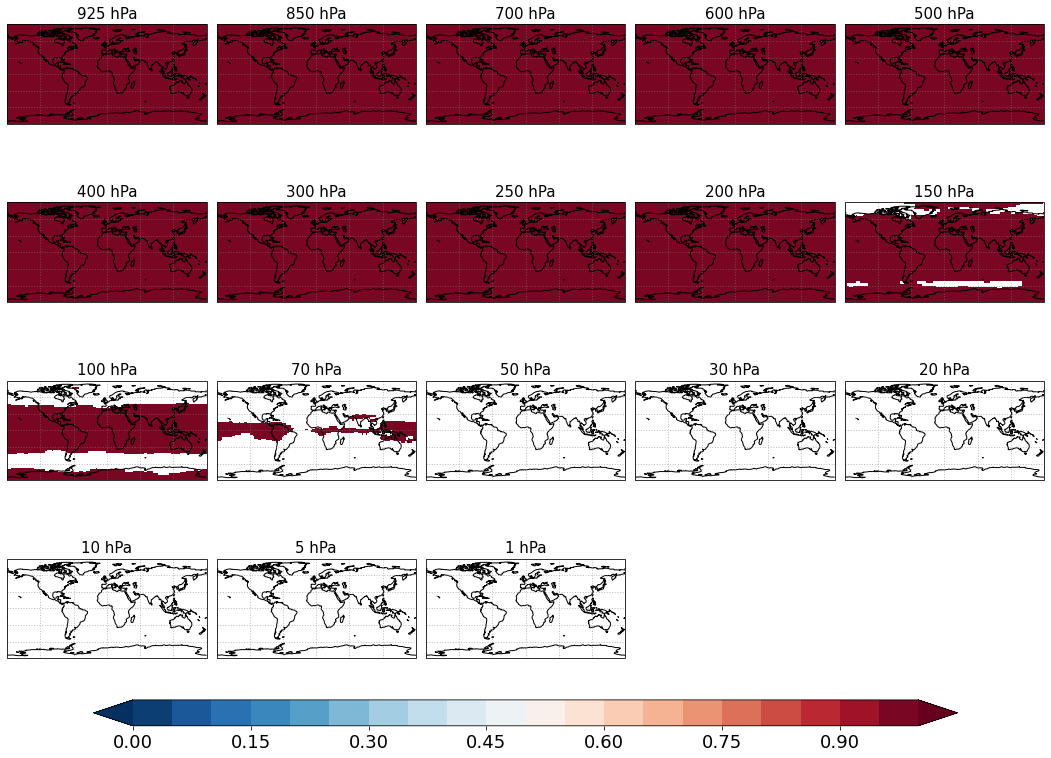

In [46]:
ctl.plot_multimap_contour([mm[i] for i in range(len(mm.plev))], cbar_range = (0, 1), subtitles = [f'{int(lev.values/100)} hPa' for lev in mm.plev])

## Calculating surface pressure mask
Vertical integration starts from surface pressure

In [47]:
ps = xr.open_mfdataset('/home/fabiano/work_big/irods_move/stabilization-hist-1990/r1i1p1f1/Amon/ps/ps_Amon_EC-Earth3_stabilization-hist-1990_r1i1p1f1_gr_199?01-199?12.nc')
psclim = ps.groupby('time.month').mean()
psye = psclim['ps'].mean('month')
psye_rg = ctl.regrid_dataset(psye, k.lat, k.lon)

Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.085713


Adding cyclic point



<GeoAxesSubplot:>

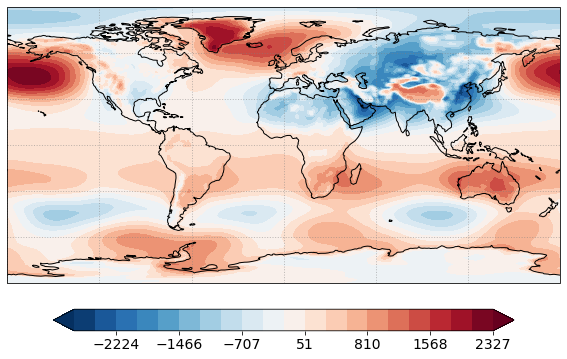

In [48]:
ctl.plot_map_contour(psclim['ps'][6]-psclim['ps'][0])

Adding cyclic point



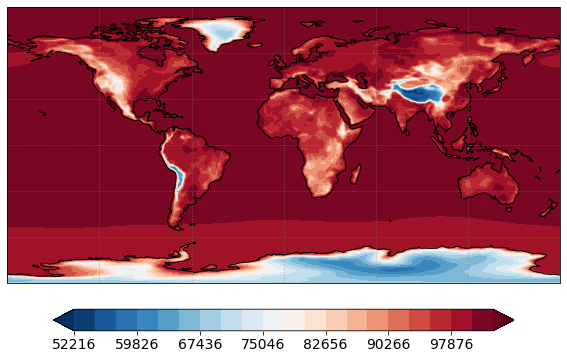

In [49]:
fig = ctl.plot_map_contour(psye)

In [50]:
ps2 = xr.open_mfdataset('/home/fabiano/work_big/irods_move/stabilization-ssp585-2100/r1i1p1f1/Amon/ps/ps_Amon_EC-Earth3_stabilization-ssp585-2100_r1i1p1f1_gr_300?01-300?12.nc')
psclim2 = ps2.groupby('time.month').mean()
psye2 = psclim2['ps'].mean('month')

/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/fabian

Adding cyclic point



<GeoAxesSubplot:>

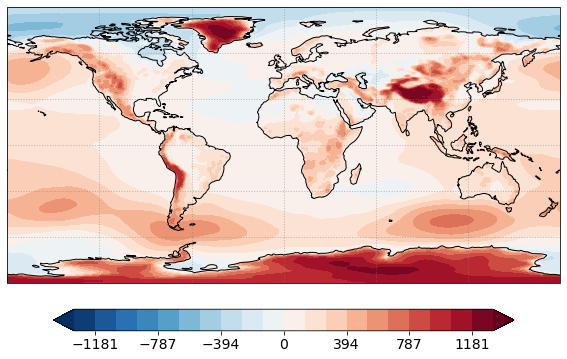

In [51]:
ctl.plot_map_contour(psye2-psye, plot_anomalies=True)

In [52]:
vlevs.player

<xarray.DataArray 'player' (player: 24)>
array([1000. ,  975. ,  950. ,  925. ,  900. ,  875. ,  850. ,  825. ,  800. ,
        775. ,  725. ,  625. ,  525. ,  425. ,  325. ,  237.5,  187.5,  137.5,
         85. ,   40. ,   15. ,    6. ,    2.5,    1. ], dtype=float32)
Coordinates:
  * player   (player) float32 1e+03 975.0 950.0 925.0 900.0 ... 15.0 6.0 2.5 1.0
Attributes:
    units:    hPa

In [53]:
psye_rg = psye_rg.compute()

In [54]:
### Mask for surf pressure

wid_mask = np.empty([len(vlevs.player)] + list(psye_rg.shape))

# for ii, (lev, wid) in enumerate(zip(vlevs.player, vlevs.dp)):
#     ps_mask[ii] = psye - lev
#     ps_mask[ps_mask < 0.] = np.nan

for ila in range(len(psye_rg.lat)):
    #print(ila)
    for ilo in range(len(psye_rg.lon)):
        ind = np.where((psye_rg[ila, ilo].values/100. - vlevs.player.values) > 0)[0][0]
        wid_mask[:ind, ila, ilo] = np.nan
        wid_mask[ind, ila, ilo] = psye_rg[ila, ilo].values/100. - vlevs.player.values[ind]
        wid_mask[ind+1:, ila, ilo] = vlevs.dp.values[ind+1:]



In [55]:
pickle.dump([mask, wid_mask], open(cart_out + 'vmasks.p', 'wb'))

In [7]:
mask, wid_mask = pickle.load(open(cart_out + 'vmasks.p', 'rb'))

In [57]:
vlevs.dp

<xarray.DataArray 'dp' (player: 24)>
array([ 25.5,  25. ,  25. ,  25. ,  25. ,  25. ,  25. ,  25. ,  25. ,
        25. ,  87.5, 100. , 100. , 100. , 100. ,  62.5,  50. ,  50. ,
        52.5,  35. ,  16.5,   4.5,   2.5,   1. ], dtype=float32)
Coordinates:
  * player   (player) float32 1e+03 975.0 950.0 925.0 900.0 ... 15.0 6.0 2.5 1.0

In [58]:
wid_mask.shape

(24, 73, 144)

In [59]:
np.nanmin(wid_mask), np.nanmax(wid_mask)

(0.0014062499999454303, 100.0)

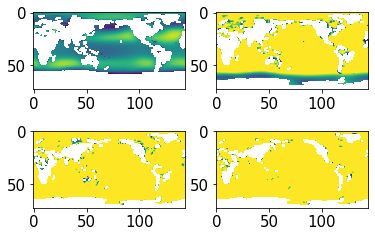

In [60]:
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(wid_mask[0], vmin = 0., vmax = 25.)
axs[0,1].imshow(wid_mask[1], vmin = 0., vmax = 25.)
axs[1,0].imshow(wid_mask[2], vmin = 0., vmax = 25.)
axs[1,1].imshow(wid_mask[3], vmin = 0., vmax = 25.)
#plt.colorbar()

# Calculating feedbacks

In [7]:
feedbacks = dict()
cose = 100*vlevs.player

In [10]:
remove_pi_runmean = True # way to compute anomalies: against 20-yr running mean of the picontrol simulation (True) or against picontrol climatology (False)
n_runmean = 20

In [14]:
from importlib import reload
reload(ctl)

No DISPLAY variable set. Switching to agg backend


<module 'climtools.climtools_lib' from '/home/fabiano/Research/git/ClimTools/climtools/climtools_lib.py'>

In [23]:
#calcolo per ts_anom e gtas
vnam = 'ts'

filist = glob.glob(filin_4c.format(vnam))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])
print(len(filist))

if remove_pi_runmean:
    filist = glob.glob(filin_pi.format(vnam))
    filist.sort()
    pivar = xr.open_mfdataset(filist, chunks = {'time': 60}, use_cftime=True)[vnam]
    pivar = pivar.sel(time = slice('2540-01-01', '2689-12-31'))
    if len(pivar['time']) != len(var['time']): 
        raise ValueError('different length of PI and 4xco2!')
    else:
        pivar['time'] = var['time']
else:
    pivar = piclim[vnam]

piok = ctl.regrid_dataset(pivar, k.lat, k.lon)
var = ctl.regrid_dataset(var[vnam], k.lat, k.lon) 

if remove_pi_runmean:
    anoms = var - ctl.running_mean(piok, 12*n_runmean)
else:
    anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)

for tip in ['clr', 'cld']:
    kernel = allkers[(tip, 'ts')].lwkernel

    dRt = xr.apply_ufunc(lambda x, ker: x*ker, anoms.groupby('time.month'), kernel, dask = 'allowed').groupby('time.year').mean('time')

    dRt_glob = ctl.global_mean(dRt)
    feedbacks[( tip, 'planck-surf')] = dRt_glob.compute()

anoms.compute()
ts_anom = anoms
g_ts = ctl.global_mean(anoms).groupby('time.year').mean('time')

#pickle.dump(gtas, open(cart_out + 'feedback_gtas.p', 'wb'))
#pickle.dump(ts_anom, open(cart_out + 'ts_anom.p', 'wb'))               

165
Regridding...
Regridding completed in 0:00:01.040794
Regridding...
Regridding completed in 0:00:00.167037


689.9849418206708

In [17]:
piok

<xarray.DataArray (time: 1800, lat: 73, lon: 144)>
dask.array<astype, shape=(1800, 73, 144), dtype=float32, chunksize=(12, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2259-01-16 12:00:00 ... 2408-12-16 12:00:00
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    regrid_method:  bilinear

### Atmospheric Planck and lapse-rate

In [20]:
filist = glob.glob(filin_4c.format('ta'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year], chunks = {'time': 60})
print(1, type(var['ta'].data))
var = var['ta']
var = ctl.regrid_dataset(var, k.lat, k.lon)
print(2, type(var.data))

# pimean[('ta')] = pickle.load(open(cart_out + 'pimean/pimean_ta.p', 'rb'))
# pivar = ctl.regrid_dataset(pimean[('ta')], k.lat, k.lon)

if remove_pi_runmean:
    filist = glob.glob(filin_pi.format(vnam))
    filist.sort()
    pivar = xr.open_mfdataset(filist[:num_year], chunks = {'time': 60})['ta']
    piok = ctl.regrid_dataset(pivar, k.lat, k.lon)
else:
    pivar = ctl.regrid_dataset(piclim[('ta')], k.lat, k.lon)
    piok = pivar#.compute()
    #var = var.compute()

print(var.shape)

ta_abs = var.interp(plev = cose)
ta_abs_pi = pivar.interp(plev = cose)

# calculating anomaly
anoms_ok = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok, dask = 'allowed')

anoms_ok_wstrat = anoms_ok.interp(plev = cose) # including stratosphere
anoms_ok = (anoms_ok*mask).interp(plev = cose) # without stratosphere

print(anoms_ok.shape)

for tip in ['clr','cld']:
    kernel = allkers[(tip, 't')].lwkernel
    
    ### Field anomalies
    # first method: removing surface response
    anoms_lr = (anoms_ok - ts_anom)#.compute()
    anoms_unif = (anoms_ok - anoms_lr)#.compute() # anoms_unif == ts_anom, trick to preserve dimensions

    ### Radiative anomalies

    ## 0: first method, excluding levels below surface pressure (best)
    dRt_unif = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_unif.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed')).sum('player').groupby('time.year').mean('time')
    dRt_lr = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_lr.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed')).sum('player').groupby('time.year').mean('time')

    ## 1: first method, all levels
    dRt_unif_1 = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_unif.groupby('time.month'), kernel, dask = 'allowed') * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_lr_1 = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_lr.groupby('time.month'), kernel, dask = 'allowed') * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

    del anoms_lr, anoms_unif

    # second method: removing uniform atm. response
    anoms_lr_2 = (anoms_ok - anoms_ok.mean('player'))#.compute()
    anoms_unif_2 = (anoms_ok - anoms_lr_2)#.compute()

    ## 2: second method, all levels
    dRt_unif_2 = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_unif_2.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed') * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_lr_2 = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_lr_2.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed') * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

    del anoms_lr_2, anoms_unif_2

    # third method: as first, but with stratosphere included
    anoms_lr_3 = (anoms_ok_wstrat - ts_anom)#.compute()
    anoms_unif_3 = (anoms_ok_wstrat - anoms_lr_3)#.compute()

    ## 3: third method, all levels
    dRt_unif_3 = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_unif_3.groupby('time.month'), kernel, dask = 'allowed') * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_lr_3 = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_lr_3.groupby('time.month'), kernel, dask = 'allowed') * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

    del anoms_lr_3, anoms_unif_3

    dRt_unif_glob = ctl.global_mean(dRt_unif)
    dRt_lr_glob = ctl.global_mean(dRt_lr)
    feedbacks[(tip, 'planck-atmo')] = dRt_unif_glob.compute()
    feedbacks[(tip, 'lapse-rate')] = dRt_lr_glob.compute()

    for enu, (c_uni, c_lr) in enumerate(zip([dRt_unif, dRt_unif_1, dRt_unif_2, dRt_unif_3], [dRt_lr, dRt_lr_1, dRt_lr_2, dRt_lr_3])):
        feedbacks[(tip, 'planck-atmo', 'method{}'.format(enu))] = ctl.global_mean(c_uni).compute()
        feedbacks[(tip, 'lapse-rate', 'method{}'.format(enu))] = ctl.global_mean(c_lr).compute()
    


1 <class 'dask.array.core.Array'>
Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.569372
2 <class 'dask.array.core.Array'>
Regridding...
Regridding completed in 0:00:00.183329
(1800, 19, 73, 144)


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with

(1800, 24, 73, 144)


In [22]:
del var, pivar
del anoms_ok, anoms_ok_wstrat
#del anoms_unif, anoms_lr, anoms_unif_2, anoms_lr_2, anoms_unif_3, anoms_lr_3
import gc
gc.collect()

NameError: name 'var' is not defined

In [23]:
%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


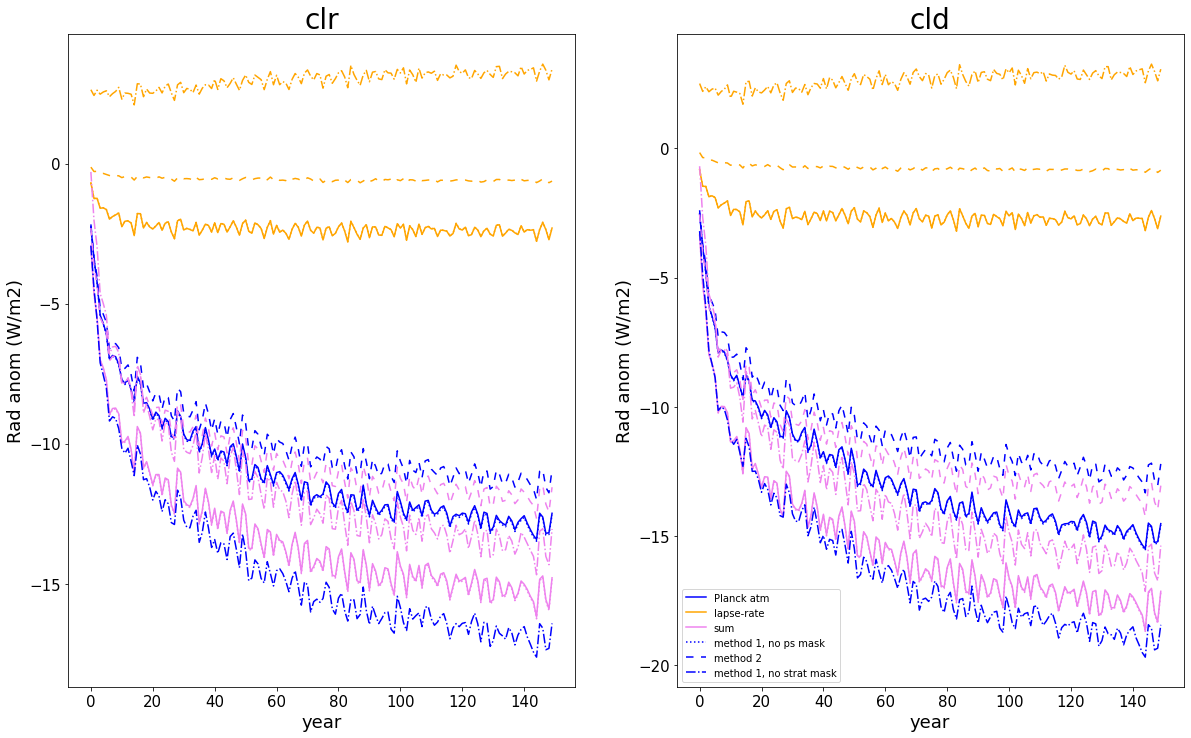

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (20,12))

for tip, ax in zip(['clr', 'cld'], axs):
    ax.plot(feedbacks[(tip, 'planck-atmo')], color = 'blue', label = 'Planck atm')
    ax.plot(feedbacks[(tip, 'lapse-rate')], color = 'orange', label = 'lapse-rate')
    ax.plot(feedbacks[(tip, 'planck-atmo')] + feedbacks[(tip, 'lapse-rate')], color = 'violet', label = 'sum')

    for mtd, ls, lab in zip(range(1, 4), [':', '--', '-.'], ['method 1, no ps mask', 'method 2', 'method 1, no strat mask']):
        ax.plot(feedbacks[(tip, 'planck-atmo', 'method{}'.format(mtd))], color = 'blue', ls = ls, label = lab)
        ax.plot(feedbacks[(tip, 'lapse-rate', 'method{}'.format(mtd))], color = 'orange', ls = ls)
        ax.plot(feedbacks[(tip, 'lapse-rate', 'method{}'.format(mtd))] + feedbacks[(tip, 'planck-atmo', 'method{}'.format(mtd))], color = 'violet', ls = ls)
    
    plt.legend()
    ax.set_ylabel('Rad anom (W/m2)')
    ax.set_xlabel('year')
    ax.set_title(tip)

fig.savefig(cart_out + 'planck_atm.pdf')

### Surface Planck

In [25]:
#calcolo planck-surf(ts) 

filist = glob.glob(filin_4c.format('ts'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])

#pimean[('ts')] = pickle.load(open(cart_out + 'pimean/pimean_ts.p', 'rb'))
#pivar = ctl.regrid_dataset(pimean[('ts')], k.lat, k.lon) 
pivar = ctl.regrid_dataset(piclim[('ts')], k.lat, k.lon) 
var = ctl.regrid_dataset(var['ts'], k.lat, k.lon) 

piok = pivar#.compute()
#var = var.compute()

anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok, dask = 'allowed')
#anoms.compute()

for tip in ['clr', 'cld']:
    kernel = allkers[(tip, 'ts')].lwkernel

    dRt = xr.apply_ufunc(lambda x, ker: x*ker, anoms.groupby('time.month'), kernel, dask = 'allowed').groupby('time.year').mean('time')

    dRt_glob = ctl.global_mean(dRt)
    feedbacks[( tip, 'planck-surf')] = dRt_glob.compute()           

Regridding...
Regridding completed in 0:00:00.158487
Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.426485


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


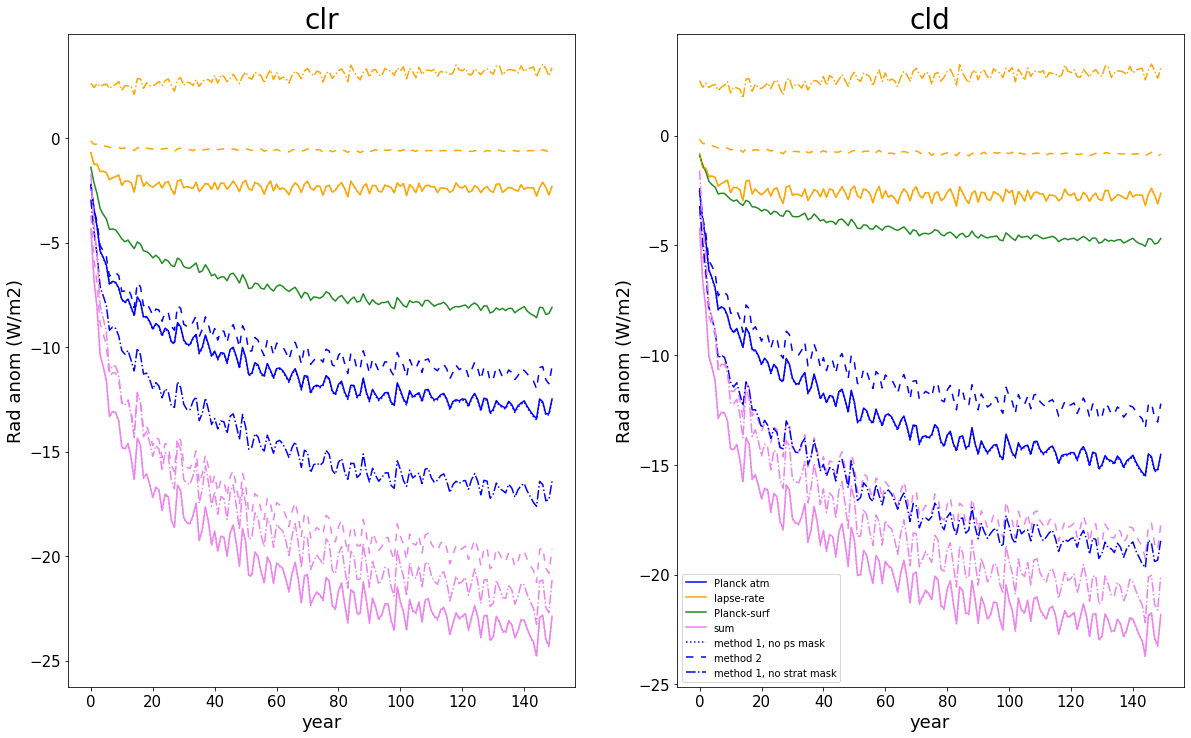

In [26]:
fig, axs = plt.subplots(1, 2, figsize = (20,12))

for tip, ax in zip(['clr', 'cld'], axs):
    ax.plot(feedbacks[(tip, 'planck-atmo')], color = 'blue', label = 'Planck atm')
    ax.plot(feedbacks[(tip, 'lapse-rate')], color = 'orange', label = 'lapse-rate')
    ax.plot(feedbacks[(tip, 'planck-surf')], color = 'forestgreen', label = 'Planck-surf')
    ax.plot(feedbacks[(tip, 'planck-atmo')] + feedbacks[(tip, 'lapse-rate')] + feedbacks[(tip, 'planck-surf')], color = 'violet', label = 'sum')

    for mtd, ls, lab in zip(range(1, 4), [':', '--', '-.'], ['method 1, no ps mask', 'method 2', 'method 1, no strat mask']):
        ax.plot(feedbacks[(tip, 'planck-atmo', 'method{}'.format(mtd))], color = 'blue', ls = ls, label = lab)
        ax.plot(feedbacks[(tip, 'lapse-rate', 'method{}'.format(mtd))], color = 'orange', ls = ls)
        ax.plot(feedbacks[(tip, 'lapse-rate', 'method{}'.format(mtd))] + feedbacks[(tip, 'planck-atmo', 'method{}'.format(mtd))] + feedbacks[(tip, 'planck-surf')], color = 'violet', ls = ls)
    
    plt.legend()
    ax.set_ylabel('Rad anom (W/m2)')
    ax.set_xlabel('year')
    ax.set_title(tip)

fig.savefig(cart_out + 'planck_atm_surf.pdf')

### Water-vapor feedback

In [45]:
# dlnws function from Huang
import dask.array as da

def pliq(T):
    pliq = 0.01 * np.exp(54.842763 - 6763.22 / T - 4.21 * np.log(T) + 0.000367 * T + np.tanh(0.0415 * (T - 218.8)) * (53.878 - 1331.22 / T - 9.44523 * np.log(T) + 0.014025 * T))
    return pliq

def pice(T):
    pice = np.exp(9.550426 - 5723.265 / T + 3.53068 * np.log(T) - 0.00728332 * T) / 100.0
    return pice

def dlnws(T):
    """
    Calculates 1/(dlnq/dT_1K).
    """
    pliq0 = pliq(T)
    pice0 = pice(T)

    T1 = T + 1.0
    pliq1 = pliq(T1)
    pice1 = pice(T1)
    
    # Use np.where to choose between pliq and pice based on the condition T >= 273
    if isinstance(T, da.core.Array):
        ws = da.where(T >= 273, pliq0, pice0)    # Dask equivalent of np.where is da.where
        ws1 = da.where(T1 >= 273, pliq1, pice1)
    else:
        ws = np.where(T >= 273, pliq0, pice0)
        ws1 = np.where(T1 >= 273, pliq1, pice1)
    
    # Calculate the inverse of the derivative dws
    dws = ws / (ws1 - ws)

    if isinstance(dws, np.ndarray):
        dws = ctl.transform_to_dataarray(T, dws, 'dlnws')
    
    return dws

In [46]:
dws = dlnws(ta_abs_pi)
print(dws)

<xarray.DataArray 'dlnws' (month: 12, player: 24, lat: 73, lon: 144)>
array([[[[ 9.33302089,  9.33302089,  9.33302089, ...,  9.33302089,
           9.33302089,  9.33302089],
         [ 9.34333121,  9.34520355,  9.34864726, ...,  9.3278984 ,
           9.33219266,  9.33670509],
         [ 9.38556659,  9.39978346,  9.40794995, ...,  9.36734325,
           9.37622401,  9.38398613],
         ...,
         [11.20311715, 11.20208704, 11.19282364, ..., 11.24171531,
          11.23077719, 11.2206394 ],
         [11.16868652, 11.16427315, 11.16186869, ..., 11.17675775,
          11.17341155, 11.17014088],
         [11.1486169 , 11.1486169 , 11.1486169 , ..., 11.1486169 ,
          11.1486169 , 11.1486169 ]],

        [[ 9.47894046,  9.47894046,  9.47894046, ...,  9.47894046,
           9.47894046,  9.47894046],
         [ 9.49079138,  9.49158169,  9.49423501, ...,  9.47833717,
           9.48177602,  9.48523232],
         [ 9.53222961,  9.54567191,  9.55285593, ...,  9.51462075,
           9.52

In [27]:
import gc
gc.collect()

495

In [28]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           31Gi       9.4Gi       5.9Gi        49Mi        15Gi        21Gi
Swap:          15Gi       601Mi        15Gi


In [47]:
filist = glob.glob(filin_4c.format('hus'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year], chunks={'time': 60})
var = var['hus']
var = ctl.regrid_dataset(var, k.lat, k.lon)
# pimean[('hus')] = pickle.load(open(cart_out + 'pimean/pimean_hus.p', 'rb'))
# pivar = ctl.regrid_dataset(pimean[('hus')], k.lat, k.lon)
pivar = ctl.regrid_dataset(piclim[('hus')], k.lat, k.lon)
piok = pivar#.compute()

#var = var.compute()

Rv = 487.5 # gas constant of water vapor
Lv = 2.5e+06 # latent heat of water vapor

for tip in ['clr','cld']:
    kernel_lw = allkers[(tip, 'wv_lw')].lwkernel
    kernel_sw = allkers[(tip, 'wv_sw')].swkernel
    kernel = kernel_lw + kernel_sw

    var_int = (var*mask).interp(plev = cose)
    piok_int = piok.interp(plev = cose)

    # Method 0, 1, 2: using normalized difference (following Huang H. & Huang Y., 2023)
    anoms_ok1 = xr.apply_ufunc(lambda x, mean: (x - mean)/mean, var_int.groupby('time.month'), piok_int, dask = 'allowed')

    coso = xr.apply_ufunc(lambda x, ta: x*ta, anoms_ok1.groupby('time.month'), ta_abs_pi**2, dask = 'allowed')#.compute() 
    # Method 0: using unperturbed T0 from pi
    dRt = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, coso.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed') * Rv/Lv).sum('player').groupby('time.year').mean('time')

    # Method 1: as 0, but without surface pressure mask
    dRt_1 = (xr.apply_ufunc(lambda x, ker: x*ker, coso.groupby('time.month'), kernel, dask = 'allowed') * Rv/Lv * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

    del anoms_ok1, coso

    # Method 3: using log difference (following Huang X.)
    anoms_ok3 = xr.apply_ufunc(lambda x, mean: np.log(x) - np.log(mean), var_int.groupby('time.month'), piok_int, dask = 'allowed')

    coso2 = xr.apply_ufunc(lambda x, ta: x*ta, anoms_ok3.groupby('time.month'), ta_abs_pi**2, dask = 'allowed')#.compute() # Method 3 (using simple formula)
    coso3 = xr.apply_ufunc(lambda x, ta: x*ta, anoms_ok3.groupby('time.month'), dlnws(ta_abs_pi), dask = 'allowed')#.compute() # Method 3 (using dlnws)
    
    # Method 2: using log difference (with simple formula for dlnws)
    dRt_2 = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, coso2.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed') * Rv/Lv).sum('player').groupby('time.year').mean('time')
    
    # Method 3: using log difference (following Huang Y. 2017 with dlnws function)
    dRt_3 = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, coso3.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed')).sum('player').groupby('time.year').mean('time')

    del anoms_ok3, coso2, coso3

    # Method 4: as method 0, but including stratosphere
    var_int_ws = var.interp(plev = cose)
    piok_int_ws = piok.interp(plev = cose)
    anoms_ok4 = xr.apply_ufunc(lambda x, mean: (x - mean)/mean, var_int_ws.groupby('time.month'), piok_int_ws, dask = 'allowed')
    coso4 = xr.apply_ufunc(lambda x, ta: x*ta, anoms_ok4.groupby('time.month'), ta_abs_pi**2, dask = 'allowed')#.compute() # Method 4

    dRt_4 = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, coso4.groupby('time.month'), kernel, wid_mask/100., dask = 'allowed') * Rv/Lv).sum('player').groupby('time.year').mean('time')

    del anoms_ok4, var_int_ws, piok_int_ws, coso4

    dRt_glob = ctl.global_mean(dRt)
    feedbacks[(tip, 'water-vapor')] = dRt_glob.compute()

    for enu, dr in enumerate([dRt, dRt_1, dRt_2, dRt_3, dRt_4]):
        feedbacks[(tip, 'water-vapor', 'method{}'.format(enu))] = ctl.global_mean(dr).compute()

         

Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.568663
Regridding...
Regridding completed in 0:00:00.183797


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


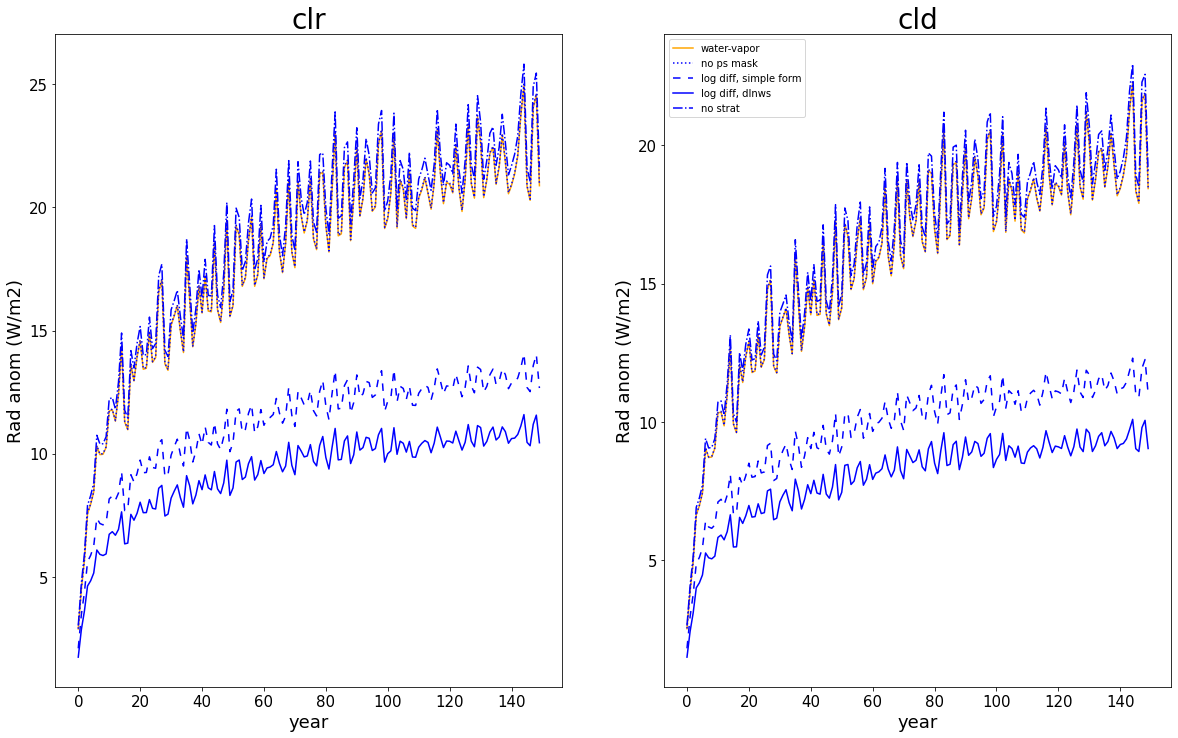

In [48]:
fig, axs = plt.subplots(1, 2, figsize = (20,12))

for tip, ax in zip(['clr', 'cld'], axs):
    ax.plot(feedbacks[(tip, 'water-vapor')], color = 'orange', label = 'water-vapor')

    for mtd, ls, lab in zip(range(1, 5), [':', '--', '-', '-.'], ['no ps mask', 'log diff, simple form', 'log diff, dlnws',  'no strat']):
        ax.plot(feedbacks[(tip, 'water-vapor', 'method{}'.format(mtd))], color = 'blue', ls = ls, label = lab)

    #ax.plot(feedbacks[(tip, 'water-vapor', 'method3')], color = 'black', ls = ':', label = 'log diff/log2')
    
    plt.legend()
    ax.set_ylabel('Rad anom (W/m2)')
    ax.set_xlabel('year')
    ax.set_title(tip)

fig.savefig(cart_out + 'water-vapor.pdf')

In [50]:
del var, pivar
gc.collect()

NameError: name 'gc' is not defined

### Albedo feedback

In [51]:
for tip in ['clr', 'cld']:
    filist_1 = glob.glob(filin_4c.format('rsus'))
    filist_1.sort()
    var_rsus = xr.open_mfdataset(filist_1[:num_year], chunks = {'time': 60})['rsus']
    filist_2 = glob.glob(filin_4c.format('rsds'))
    filist_2.sort()
    var_rsds = xr.open_mfdataset(filist_2[:num_year], chunks = {'time': 60})['rsds']
    var = var_rsus/var_rsds

    var = ctl.regrid_dataset(var, k.lat, k.lon)
    #pimean[('alb')] = pickle.load(open(cart_out + 'pimean/pimean_alb.p', 'rb'))
    #pivar = ctl.regrid_dataset(pimean[('alb')], k.lat, k.lon) 
    pivar = ctl.regrid_dataset(piclim[('alb')], k.lat, k.lon)

    piok = pivar#.compute()
    #var = var.compute()

    # Removing inf and nan from alb
    piok = piok.where(piok > 0., 0.)
    var = var.where(var > 0., 0.)
    anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok, dask = 'allowed')

    kernel = allkers[(tip, 'alb')].swkernel
    dRt = xr.apply_ufunc(lambda x, ker: x*ker, anoms.groupby('time.month'), kernel, dask = 'allowed').groupby('time.year').mean('time')
   
    dRt_glob = ctl.global_mean(dRt).compute()

    feedbacks[( tip, 'albedo')] = 100*dRt_glob
    

Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.748962
Regridding...
Regridding completed in 0:00:00.158068


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.726473
Regridding...
Regridding completed in 0:00:00.149786


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


### Computing net_toa (cld and clr) for sanity check

In [5]:
num_year = 150

In [6]:
filist_1 = glob.glob(filin_4c.format('rsut'))
filist_1.sort()
var_rsut = xr.open_mfdataset(filist_1[:num_year])['rsut']
filist_2 = glob.glob(filin_4c.format('rsdt'))
filist_2.sort()
var_rsdt = xr.open_mfdataset(filist_2[:num_year])['rsdt']
filist_1 = glob.glob(filin_4c.format('rlut'))
filist_1.sort()
var_rlut = xr.open_mfdataset(filist_1[:num_year])['rlut']

net_toa = var_rsdt - var_rsut - var_rlut
net_toa = net_toa.compute()
net_toa_glob = ctl.global_mean(net_toa)

In [7]:
pivar_nettoa = var_rsdt.mean('time') - ctl.regrid_dataset(pimean['rsut'], k.lat, k.lon) - ctl.regrid_dataset(pimean['rlut'], k.lat, k.lon)
pivar_nettoa_glob = ctl.global_mean(pivar_nettoa.compute())

Regridding...
Regridding completed in 0:00:01.373384
Regridding...
Regridding completed in 0:00:00.924345


In [8]:
dRt_glob_tot = net_toa_glob.groupby('time.year').mean()-pivar_nettoa_glob

In [30]:
type(rsutcs)

xarray.core.dataarray.DataArray

In [16]:
xe.Regridder?

Init signature:
xe.Regridder(
    ds_in,
    ds_out,
    method,
    locstream_in=False,
    locstream_out=False,
    periodic=False,
    **kwargs,
)
Docstring:      <no docstring>
Init docstring:
Make xESMF regridder

Parameters
----------
ds_in, ds_out : xarray DataSet, or dictionary
    Contain input and output grid coordinates.
    All variables that the cf-xarray accessor understand are accepted.
    Otherwise, look for ``lon``, ``lat``,
    optionally ``lon_b``, ``lat_b`` for conservative methods,
    and ``mask``. Note that for `mask`, the ESMF convention is used,
    where masked values are identified by 0, and non-masked values by 1.

    For conservative methods, if bounds are not present, they will be
    computed using `cf-xarray` (only 1D coordinates are currently supported).

    Shape can be 1D (n_lon,) and (n_lat,) for rectilinear grids,
    or 2D (n_y, n_x) for general curvilinear grids.
    Shape of bounds should be (n+1,) or (n_y+1, n_x+1).
    CF-bounds (shape (n, 2

In [29]:
rsutcs

<xarray.DataArray 'rsutcs' (time: 1800, lat: 256, lon: 512)>
dask.array<concatenate, shape=(1800, 256, 512), dtype=float32, chunksize=(12, 256, 512), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 1999-12-16T12:00:00
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    standard_name:  toa_outgoing_shortwave_flux_assuming_clear_sky
    long_name:      TOA Outgoing Clear-Sky Shortwave Radiation
    comment:        Calculated in the absence of clouds.
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-10-16T06:55:24Z altered by CMOR: Changed sign. 2019-...

In [28]:
import xesmf as xe

regridder = xe.Regridder(rsutcs, k, method='bilinear')#, extrap_method="nearest_s2d", ignore_degenerate=True)
pino = regridder(rsutcs)

ValueError: The truth value of a Array is ambiguous. Use a.any() or a.all().

In [13]:
rsutcs= ctl.regrid_dataset(rsutcs, k.lat, k.lon)

Regridding...


ValueError: The truth value of a Array is ambiguous. Use a.any() or a.all().

In [9]:
filist = glob.glob(filin_4c1.format('rsutcs')) 
filist.sort()
rsutcs = xr.open_mfdataset(filist[:num_year])['rsutcs']
rsutcs= ctl.regrid_dataset(rsutcs, k.lat, k.lon)

filist = glob.glob(filin_4c1.format('rlutcs'))
filist.sort()
rlutcs = xr.open_mfdataset(filist[:num_year])['rlutcs']
rlutcs = ctl.regrid_dataset(rlutcs, k.lat, k.lon)

filist_2 = glob.glob(filin_4c.format('rsdt'))
filist_2.sort()
var_rsdt = xr.open_mfdataset(filist_2[:num_year])['rsdt']
rsdt = ctl.regrid_dataset(var_rsdt, k.lat, k.lon)

net_toa_cs = rsdt - rsutcs - rlutcs
net_toa_cs = net_toa_cs.compute()
net_toa_glob_cs = ctl.global_mean(net_toa_cs)

Regridding...
Regridding completed in 0:00:02.809416
Regridding...
Regridding completed in 0:00:01.013942
Regridding...
Regridding completed in 0:00:00.166706


In [10]:
pivar_nettoa_cs = rsdt.mean('time') - ctl.regrid_dataset(pimean['rsutcs'], k.lat, k.lon) - ctl.regrid_dataset(pimean['rlutcs'], k.lat, k.lon)
pivar_nettoa_glob_cs = ctl.global_mean(pivar_nettoa_cs.compute())

Regridding...
Regridding completed in 0:00:00.184313
Regridding...
Regridding completed in 0:00:00.177104


In [11]:
dRt_glob_tot_cs = net_toa_glob_cs.groupby('time.year').mean()-pivar_nettoa_glob_cs

<xarray.DataArray ()>
array(7.29482447)
Coordinates:
    year     int64 1850 <xarray.DataArray ()>
array(17.05516828)


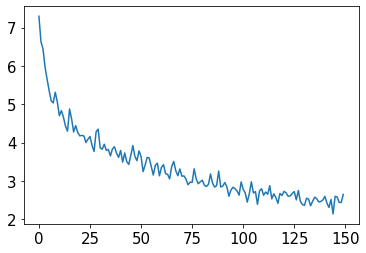

In [62]:
plt.plot(dRt_glob_tot_cs)
print(dRt_glob_tot_cs[0], pivar_nettoa_glob_cs)

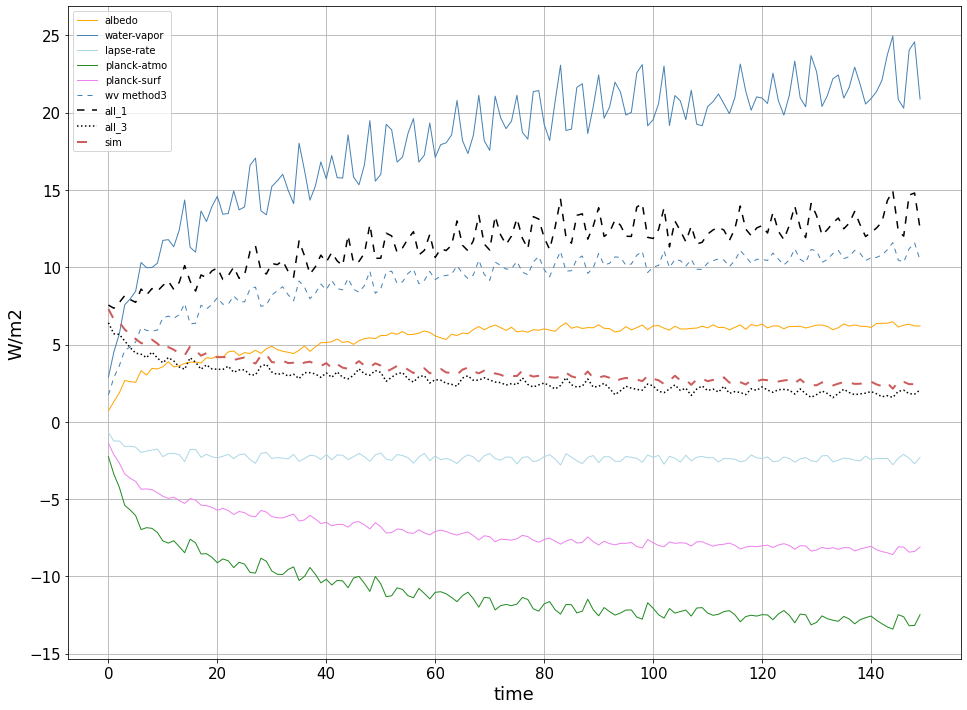

In [63]:
fig = plt.figure(figsize = (16,12))

tip = 'clr'

allfb = ['albedo', 'water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']
colorz = ['orange', 'steelblue', 'lightblue', 'forestgreen', 'violet', 'pink']
for var, col in zip(allfb, colorz):
    plt.plot(feedbacks[(tip, var)], color = col, lw = 1, label = var)

plt.plot(feedbacks[(tip, 'water-vapor', 'method3')], color = 'steelblue', lw = 1, ls = '--', label = 'wv method3')

plt.plot(8.3 + np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0), color = 'black', ls = '--', label = 'all_1')

plt.plot(8.3 + np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0) - feedbacks[(tip, 'water-vapor')] + feedbacks[(tip, 'water-vapor', 'method3')], color = 'black', ls = ':', label = 'all_3')

# allfb = ['water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']
# plt.plot(7.4 + np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0), color = 'black', ls = ':', label = 'all_noalb')

plt.plot(dRt_glob_tot_cs, color = 'indianred', ls = '--', lw = 2, label = 'sim')
#plt.plot(dRt_glob_tot_cs + pivar_nettoa_glob_cs , color = 'indianred', ls = ':', lw = 2, label = 'sim')
plt.legend()
plt.grid()
plt.ylabel('W/m2')
plt.xlabel('time')

fig.savefig(cart_out + 'check_all_clr.pdf')

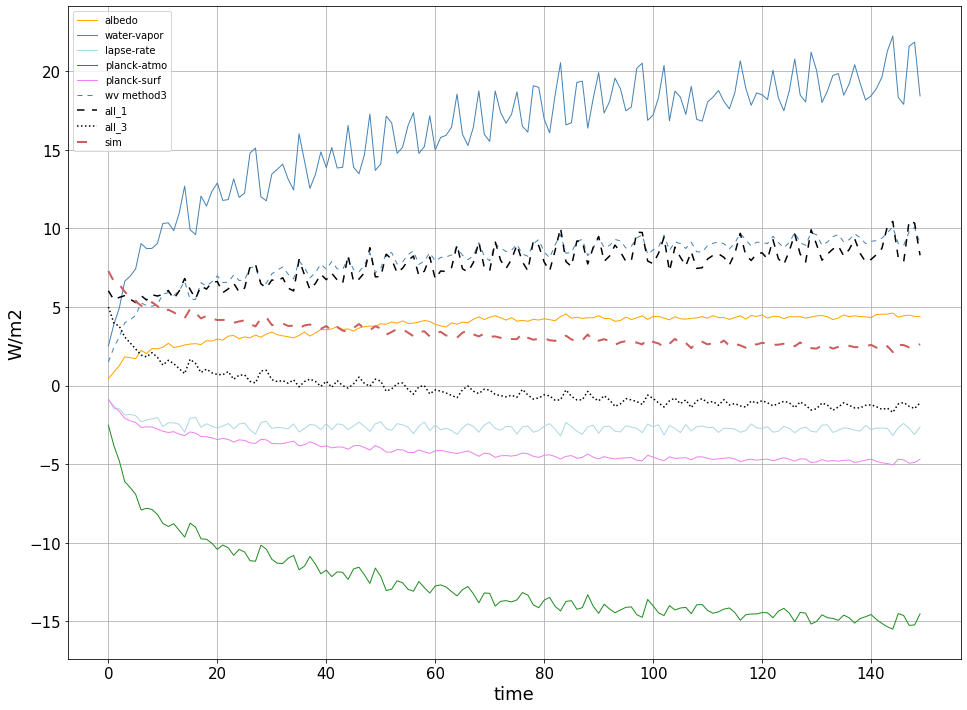

In [64]:
fig = plt.figure(figsize = (16,12))

tip = 'cld'

allfb = ['albedo', 'water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']
colorz = ['orange', 'steelblue', 'lightblue', 'forestgreen', 'violet', 'pink']
for var, col in zip(allfb, colorz):
    plt.plot(feedbacks[(tip, var)], color = col, lw = 1, label = var)

plt.plot(feedbacks[(tip, 'water-vapor', 'method3')], color = 'steelblue', lw = 1, ls = '--', label = 'wv method3')

plt.plot(7.3 + np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0), color = 'black', ls = '--', label = 'all_1')

plt.plot(7.3 + np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0) - feedbacks[(tip, 'water-vapor')] + feedbacks[(tip, 'water-vapor', 'method3')], color = 'black', ls = ':', label = 'all_3')

# allfb = ['water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']
# plt.plot(7.4 + np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0), color = 'black', ls = ':', label = 'all_noalb')

plt.plot(dRt_glob_tot_cs, color = 'indianred', ls = '--', lw = 2, label = 'sim')
#plt.plot(dRt_glob_tot_cs + pivar_nettoa_glob_cs , color = 'indianred', ls = ':', lw = 2, label = 'sim')
plt.legend()
plt.grid()
plt.ylabel('W/m2')
plt.xlabel('time')

fig.savefig(cart_out + 'check_all_cld.pdf')

In [65]:
for tip in ['clr', 'cld']:
    feedbacks[(tip, 'water-vapor')] = feedbacks[(tip, 'water-vapor', 'method3')]

pickle.dump(feedbacks, open(cart_out + f'feedbacks_150y_control.p', 'wb'))

In [12]:
filist = glob.glob(filin_4c.format('tas'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])

gtas = ctl.global_mean(var['tas'].groupby('time.year').mean()) - ctl.global_mean(pimean['tas'])
gtas = gtas.compute()

In [13]:
gtas10 = gtas.groupby(gtas.year // 10 * 10).mean(dim='year')

In [68]:
fbnams = ['planck-surf',  'water-vapor',  'albedo', 'lapse-rate', 'planck-atmo']

fb_coef = dict()

for ke in feedbacks:
    gtas10 = gtas.groupby(gtas.year // 10 * 10).mean(dim='year')
    coso = feedbacks[ke].groupby(feedbacks[ke].year // 10 * 10).mean(dim='year')

    res = stats.linregress(gtas10, coso)
    fb_coef[ke] = res

pickle.dump(fb_coef, open(cart_out + 'fbcoef_150y_control.p', 'wb'))


In [14]:
pickle.dump([gtas, net_toa_cs, net_toa], open(cart_out + 'gtas_nettoa_150y_control.p', 'wb'))

## Cloud feedback and final calc

In [15]:
fb_coef = pickle.load(open(cart_out + 'fbcoef_150y_control.p', 'rb'))
feedbacks = pickle.load(open(cart_out + 'feedbacks_150y_control.p', 'rb'))

In [16]:
gtas, net_toa_cs, net_toa = pickle.load(open(cart_out + 'gtas_nettoa_150y_control.p', 'rb'))

### 10 years averages

In [21]:
%matplotlib inline

In [17]:
n_aver = 10

In [19]:
### CLOUD FEEDBACK shell 2008
fbnams = ['planck-surf',  'water-vapor',  'albedo', 'lapse-rate', 'planck-atmo']

N0 = net_toa_cs
N = net_toa

crf = (N0 - N) 
crf = crf.groupby('time.year').mean('time')

N = N.groupby('time.year').mean()
N0 = N0.groupby('time.year').mean()

crf_glob = ctl.global_mean(crf).compute()
N_glob = ctl.global_mean(N).compute()
N0_glob = ctl.global_mean(N0).compute()

crf_glob10 = crf_glob.groupby((crf_glob.year) // n_aver * n_aver).mean(dim='year')
N_glob10 = N_glob.groupby((N_glob.year) // n_aver * n_aver).mean(dim='year')
N0_glob10 = N0_glob.groupby((N0_glob.year) // n_aver * n_aver).mean(dim='year')

gtas10 = gtas.groupby(gtas.year // n_aver * n_aver).mean(dim='year')

res_N = stats.linregress(gtas10, N_glob10)
res_N0 = stats.linregress(gtas10, N0_glob10)
res_crf = stats.linregress(gtas10, crf_glob10)

# Only first 10 years for estimating forcing
n_forc = 10
F0 = stats.linregress(gtas[:n_forc], N0_glob[:n_forc]).intercept - pivar_nettoa_glob_cs
F = stats.linregress(gtas[:n_forc], N_glob[:n_forc]).intercept - pivar_nettoa_glob

# F0 = res_N0.intercept - pivar_nettoa_glob_cs # pimean[('rlutcs')] + pimean[('rsutcs')] 
# F = res_N.intercept - pivar_nettoa_glob # pimean[('rlut')] + pimean[('rsut')]

print(F0, F)

# fb_cloud = res_crf.slope + np.nansum([fb_coef[(exp, 'clr', fbn)].slope - fb_coef[(exp, 'cld', fbn)].slope for fbn in fbnams]) + (F0_glob - F_glob)/gtas[-5:].mean() ## as in Soden
fb_cloud2 = -res_crf.slope + np.nansum([fb_coef[('clr', fbn)].slope - fb_coef[('cld', fbn)].slope for fbn in fbnams]) #letto in Caldwell2016

fb_cloud_err2 = np.sqrt(res_crf.stderr**2 + np.nansum([fb_coef[('cld', fbn)].stderr**2 for fbn in fbnams]))

#pickle.dump(fb_cloud2, open(cart_out + 'prima fase/cloud_feedback.p', 'wb'))
#pickle.dump(fb_cloud_err2, open(cart_out + 'prima fase/clouderr_feedback.p', 'wb'))


<xarray.DataArray ()>
array(8.35222252) <xarray.DataArray ()>
array(7.78453929)


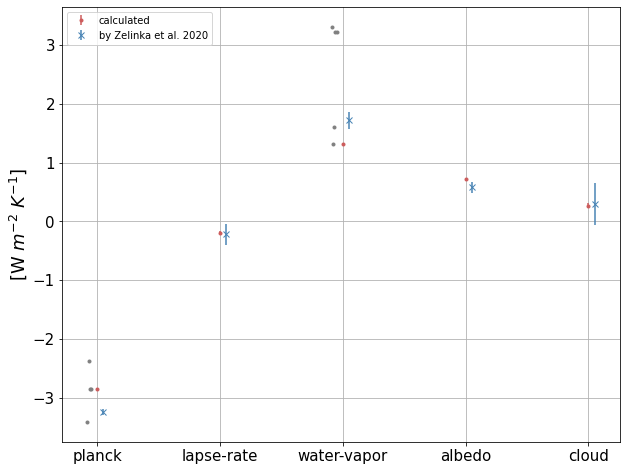

In [22]:
#grafico feedback
ac = (fb_coef[('cld', 'planck-surf')].slope + fb_coef[('cld', 'planck-atmo')].slope)
data = [ac, fb_coef[('cld','lapse-rate')].slope, fb_coef[('cld', 'water-vapor')].slope, fb_coef[('cld', 'albedo')].slope, fb_cloud2]

data1 =[-3.24, -0.22,  1.72,  0.58, 0.29]
err = [(fb_coef[('cld', 'planck-surf')].stderr + fb_coef[('cld', 'planck-atmo')].stderr), fb_coef[('cld','lapse-rate')].stderr, fb_coef[('cld', 'water-vapor')].stderr, fb_coef[('cld', 'albedo')].stderr, fb_cloud_err2]

err1 = [0.05, 0.18, 0.14, 0.09, 0.36]
fbnams1 = ['planck', 'lapse-rate', 'water-vapor', 'albedo', 'cloud']

fig = plt.figure(figsize=(10,8))
offset=0.05
plt.errorbar(range(len(fbnams1)), data, yerr=err, marker=".", linestyle= 'None', label='calculated', color='indianred')
plt.errorbar([x+offset for x in range(len(fbnams1))], data1, yerr=err1, marker="x", linestyle= 'None', label='by Zelinka et al. 2020', color='steelblue')

tip = 'cld'
for mtd in range(5):
    if (tip, 'planck-atmo', f'method{mtd}') in fb_coef:
        plt.scatter(0 - 0.05 - 0.01*mtd, fb_coef[(tip, 'planck-surf')].slope + fb_coef[(tip, 'planck-atmo', f'method{mtd}')].slope, color = 'grey', marker = '.')

for mtd in range(6):
    if (tip, 'water-vapor', f'method{mtd}') in fb_coef:
        plt.scatter(2 - 0.05 - 0.01*mtd, fb_coef[(tip, 'water-vapor', f'method{mtd}')].slope, color = 'grey', marker = '.')

plt.xticks(range(len(fbnams1)), fbnams1)
plt.legend(loc='upper left')
plt.ylabel('[W $m^{-2}$ $K^{-1}$]')
#plt.title('Climate Feedback')
plt.grid()
fig.savefig(cart_out + 'check_feedbacks_vs_zelinka.pdf')

### 1 year regression

In [23]:
n_aver = 1

In [26]:
fbnams = ['planck-surf',  'water-vapor',  'albedo', 'lapse-rate', 'planck-atmo']

fb_coef_1yr = dict()
for ke in feedbacks:
    res = stats.linregress(gtas, feedbacks[ke])
    fb_coef_1yr[ke] = res

pickle.dump(fb_coef, open(cart_out + 'fbcoef_150y_control_1yrregre.p', 'wb'))

In [27]:
### CLOUD FEEDBACK shell 2008
fbnams = ['planck-surf',  'water-vapor',  'albedo', 'lapse-rate', 'planck-atmo']

N0 = net_toa_cs
N = net_toa

crf = (N0 - N) 
crf = crf.groupby('time.year').mean('time')

N = N.groupby('time.year').mean()
N0 = N0.groupby('time.year').mean()

crf_glob = ctl.global_mean(crf).compute()
N_glob = ctl.global_mean(N).compute()
N0_glob = ctl.global_mean(N0).compute()

res_N = stats.linregress(gtas, N_glob)
res_N0 = stats.linregress(gtas, N0_glob)
res_crf = stats.linregress(gtas, crf_glob)

# Only first 10 years for estimating forcing
n_forc = 10
F0 = stats.linregress(gtas[:n_forc], N0_glob[:n_forc]).intercept - pivar_nettoa_glob_cs
F = stats.linregress(gtas[:n_forc], N_glob[:n_forc]).intercept - pivar_nettoa_glob

# F0 = res_N0.intercept - pivar_nettoa_glob_cs # pimean[('rlutcs')] + pimean[('rsutcs')] 
# F = res_N.intercept - pivar_nettoa_glob # pimean[('rlut')] + pimean[('rsut')]

print(F0, F)

# fb_cloud = res_crf.slope + np.nansum([fb_coef[(exp, 'clr', fbn)].slope - fb_coef[(exp, 'cld', fbn)].slope for fbn in fbnams]) + (F0_glob - F_glob)/gtas[-5:].mean() ## as in Soden
fb_cloud2 = -res_crf.slope + np.nansum([fb_coef_1yr[('clr', fbn)].slope - fb_coef_1yr[('cld', fbn)].slope for fbn in fbnams]) #letto in Caldwell2016

fb_cloud_err2 = np.sqrt(res_crf.stderr**2 + np.nansum([fb_coef_1yr[('cld', fbn)].stderr**2 for fbn in fbnams]))

#pickle.dump(fb_cloud2, open(cart_out + 'prima fase/cloud_feedback.p', 'wb'))
#pickle.dump(fb_cloud_err2, open(cart_out + 'prima fase/clouderr_feedback.p', 'wb'))


<xarray.DataArray ()>
array(8.35222252) <xarray.DataArray ()>
array(7.78453929)


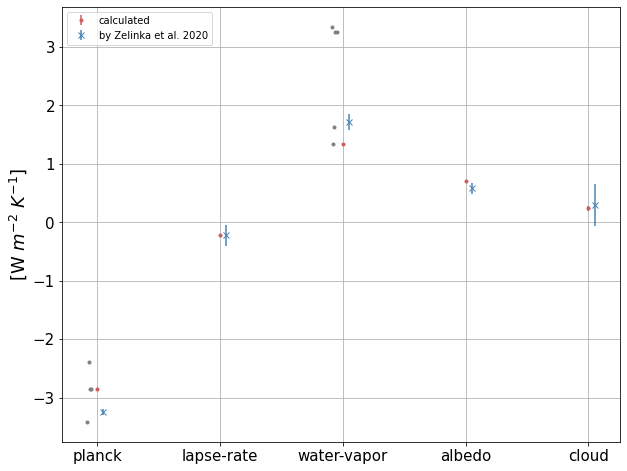

In [29]:
#grafico feedback
ac = (fb_coef_1yr[('cld', 'planck-surf')].slope + fb_coef_1yr[('cld', 'planck-atmo')].slope)
data = [ac, fb_coef_1yr[('cld','lapse-rate')].slope, fb_coef_1yr[('cld', 'water-vapor')].slope, fb_coef[('cld', 'albedo')].slope, fb_cloud2]

data1 =[-3.24, -0.22,  1.72,  0.58, 0.29]
err = [(fb_coef_1yr[('cld', 'planck-surf')].stderr + fb_coef_1yr[('cld', 'planck-atmo')].stderr), fb_coef[('cld','lapse-rate')].stderr, fb_coef_1yr[('cld', 'water-vapor')].stderr, fb_coef_1yr[('cld', 'albedo')].stderr, fb_cloud_err2]

err1 = [0.05, 0.18, 0.14, 0.09, 0.36]
fbnams1 = ['planck', 'lapse-rate', 'water-vapor', 'albedo', 'cloud']

fig = plt.figure(figsize=(10,8))
offset=0.05
plt.errorbar(range(len(fbnams1)), data, yerr=err, marker=".", linestyle= 'None', label='calculated', color='indianred')
plt.errorbar([x+offset for x in range(len(fbnams1))], data1, yerr=err1, marker="x", linestyle= 'None', label='by Zelinka et al. 2020', color='steelblue')

tip = 'cld'
for mtd in range(5):
    if (tip, 'planck-atmo', f'method{mtd}') in fb_coef_1yr:
        plt.scatter(0 - 0.05 - 0.01*mtd, fb_coef_1yr[(tip, 'planck-surf')].slope + fb_coef_1yr[(tip, 'planck-atmo', f'method{mtd}')].slope, color = 'grey', marker = '.')

for mtd in range(6):
    if (tip, 'water-vapor', f'method{mtd}') in fb_coef_1yr:
        plt.scatter(2 - 0.05 - 0.01*mtd, fb_coef_1yr[(tip, 'water-vapor', f'method{mtd}')].slope, color = 'grey', marker = '.')

plt.xticks(range(len(fbnams1)), fbnams1)
plt.legend(loc='upper left')
plt.ylabel('[W $m^{-2}$ $K^{-1}$]')
#plt.title('Climate Feedback')
plt.grid()
fig.savefig(cart_out + 'check_feedbacks_vs_zelinka_1yr.pdf')